In [2]:
%matplotlib inline
import sys
sys.path.append("/Users/edwardlrichards/compAcoustics") 
sys.path.append("/Users/edwardlrichards/swellEx") 

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import swellEx_env
import loadCSDM as cm
from normalMode import Chinook
from beamformers import bartlet, wnc_op

In [7]:
f = 49
decimation = 10
fB_width = 300
sD = 54
enviornment = swellEx_env.loadEnviornment()
sensorPosition = swellEx_env.loadArray()

# Match field boundries
zMax = enviornment.getProfile(0.).getZatInterface()[1]
rMax = 1e4  # m

In [8]:
mf_result = np.load('matchedFilterResult.npz')

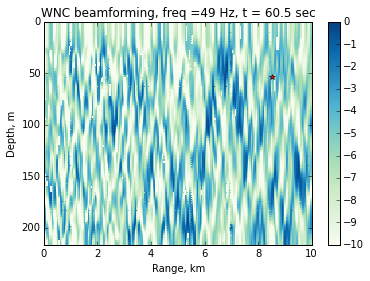

In [11]:
i = 2
_ = plt.pcolormesh(mf_result['R_nm'] / 1e3, mf_result['Z'],\
                   np.array(mf_result['B_wnc'][i]).T,\
                   cmap = plt.cm.GnBu)
_ = plt.clim(-10, 0)
_ = plt.colorbar()
_ = plt.xlim(0, np.max(mf_result['R_nm']) / 1e3)
_ = plt.ylim(np.max(mf_result['Z']),0)
_ = plt.title('WNC beamforming, freq =' + str(f) +\
              ' Hz, t = ' + str(mf_result['t'][i]) + ' sec')
_ = plt.plot(swellEx_env.getRangeAtTime(mf_result['t'][i]), sD, 'r*')
_ = plt.ylabel('Depth, m')
_ = plt.xlabel('Range, km')